In [1]:
#
# Purpose is to read in large set of csv downloaded from FINRA, parse into invidual tickers, sort by date and write out into directories.

import pandas as pd
import os
import datetime as dt
date_fmt ='%Y%m%d'
import time
import fnmatch
import time
import numpy as np
from matplotlib import pyplot as plt


In [2]:
def get_df(shortdata_dir, exchange, x):
    sdir =  os.path.join(shortdata_dir,exchange)
    prefix = exchange+'shvol'
    # look for files in the date range and make a list
    xxx = []
    for shortdate in x:
        #print(shortdate)
        for file in os.listdir(sdir):
            matchme = prefix+str(shortdate)+'*'
            if fnmatch.fnmatch(file, matchme):
                xxx.append(file)

    # open the files, read them in, and concat them
    dataframes_list =[]
    for file in xxx:
        filename = sdir+'/'+file
        try:
            temp_df = pd.read_csv(filename, delimiter='|',)
            # drop all nan values. 
            temp_df = temp_df.dropna()
            # calculate interesting things
            temp_df['NetShort'] = temp_df.TotalVolume - 2*(temp_df.ShortExemptVolume + temp_df.ShortVolume)
            temp_df['NetShortPercent'] = (temp_df.NetShort / temp_df.TotalVolume) * 100
            temp_df['CumNetShort'] = np.cumsum(temp_df.NetShort)
            # make dates usable
            temp_df["Date"] = pd.to_datetime(temp_df["Date"], format='%Y%m%d')
            dataframes_list.append(temp_df)

        except:
            print('No file {}'.format(filename))

    df = pd.concat(dataframes_list)

    # return raw dataframe.

    return df


In [3]:
def sort_df(df,exchange):
    # get a list of unique symbols
    Symbols = df.Symbol.unique()
    # sort the dataframe by symbol
    gk = df.groupby('Symbol')

    # iterate through all the symbols
    for symbol in Symbols:
        # extract a symbol
        sgk = gk.get_group(symbol)
        # Sort it by date
        sgk = sgk.sort_values(by='Date')

        #writeSymbol(df, symbol, exchange)


In [4]:
start_date  = '20090101' # Format required -- %Y%m%d
end_date    = '20220201' # Format required -- %Y%m%d

exchanges   = ['CNMS', 'FNQC', 'FNRA', 'FNSQ', 'FNYX', 'FORF']
x = pd.date_range(start=start_date,end=end_date,freq='D').strftime('%Y%m%d')

shortdata_dir ='shortdata'
parent_dir = 'symboldata'


df = get_df(shortdata_dir, exchanges[0], x)


In [5]:
Symbols = df.Symbol.unique()
# sort the dataframe by symbol
gk = df.groupby('Symbol')


In [8]:
thresh = pd.Timestamp('20220101')
derp = []
for symbol in Symbols:
    sgk = gk.get_group(symbol)
    sgk = sgk.sort_values(by='Date')
    most_recent_date = sgk['Date'].max()
    if most_recent_date > thresh:
        derp.append(symbol)

    if symbol == 'GME':
        dd = sgk


Text(0, 0.5, 'Percent Shorted per Day')

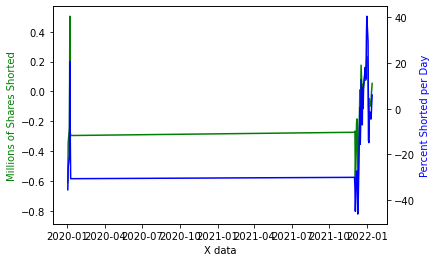

In [9]:
GME = gk.get_group('GME')
GME = GME.sort_values(by='Date')

x = GME['Date']
y1 = GME['NetShort']/1e6
y2 = GME['NetShortPercent']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Millions of Shares Shorted', color='g')
ax2.set_ylabel('Percent Shorted per Day', color='b')



In [ ]:

#sgk.CumNetShort 
plt.plot(derp)

In [ ]:
thresh = pd.Timestamp('20220101')

In [13]:
GME

,Date,Symbol,ShortVolume,ShortExemptVolume,TotalVolume,Market,NetShort,NetShortPercent,CumNetShort
0,2020-01-02,A,93998.0,378.0,277507.0,"B,Q,N",88755.0,31.982977,88755.0
0,2020-01-03,A,88944.0,74.0,266653.0,"B,Q,N",88617.0,33.233078,88617.0
0,2020-01-06,A,140749.0,952.0,425920.0,"B,Q,N",142518.0,33.461213,142518.0
0,2020-01-07,A,66774.0,30.0,413558.0,"B,Q,N",279950.0,67.693044,279950.0
0,2020-01-08,A,155459.0,1318.0,452131.0,"B,Q,N",138577.0,30.649745,138577.0
0,2020-01-09,A,199843.0,369.0,418630.0,"B,Q,N",18206.0,4.348948,18206.0
0,2021-12-01,A,132251.0,122.0,337353.0,"B,Q,N",72607.0,21.522559,72607.0
0,2021-12-02,A,146399.0,0.0,318733.0,"B,Q,N",25935.0,8.136905,25935.0
0,2021-12-03,A,108474.0,113.0,229822.0,"B,Q,N",12648.0,5.503390,12648.0
0,2021-12-06,A,203195.0,345.0,445824.0,"B,Q,N",38744.0,8.690425,38744.0
